In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import RocCurveDisplay
import sklearn.feature_selection
import sklearn.pipeline
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, auc, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# Hier werden unterschiedliche optimale DT Modelle erstellt.  
# GridSearchCV wird für die Suche nach optimalen Parametern angewendet
# Training und Evaluation passiert auf der 5-Kreuzvalidierung
# und das alles passiert auf drei Datensätzen

In [5]:
params = {'max_leaf_nodes': list(range(2, 500)), 'min_samples_split': [2, 3, 4]}

# interessanetrweise die unteren Parameter ergaben schlechte Performance er Modelle
'''
params = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}
'''

"\nparams = {'splitter' : ['best', 'random'],\n'criterion' : ['gini', 'entropy'],\n'max_features': ['log2', 'sqrt','auto'],\n'max_depth': [2, 3, 5, 10, 17],\n'min_samples_split': [2, 3, 5, 7, 9],\n'min_samples_leaf': [1,5,8,11],\n'random_state' : [0,1,2,3,4,5]\n}\n"

In [3]:
df = pd.read_csv('./../data/application_data_onehotencoded.csv')
y = df['TARGET'].to_numpy().reshape(-1,1)
a = [df.columns[0]]
b = df.columns[2:]
res = [*a, *b]
x = df[res].to_numpy() # for all but last column


Fitting 5 folds for each of 1494 candidates, totalling 7470 fits
F1:  0.5471698113207547
Precision:  0.48333333333333334
Recall:  0.6304347826086957
false positive rate:  0.12142857142857143
true positive rate: 0.6304347826086957
Fitting 5 folds for each of 1494 candidates, totalling 7470 fits
F1:  0.5283018867924527
Precision:  0.4666666666666667
Recall:  0.6086956521739131
false positive rate:  0.12857142857142856
true positive rate: 0.6086956521739131
Fitting 5 folds for each of 1494 candidates, totalling 7470 fits
F1:  0.3
Precision:  0.2
Recall:  0.6
false positive rate:  0.05714285714285714
true positive rate: 0.6
Fitting 5 folds for each of 1494 candidates, totalling 7470 fits
F1:  0.4090909090909091
Precision:  0.3
Recall:  0.6428571428571429
false positive rate:  0.07142857142857142
true positive rate: 0.6428571428571429
Fitting 5 folds for each of 1494 candidates, totalling 7470 fits
F1:  0.4466019417475728
Precision:  0.38333333333333336
Recall:  0.5348837209302325
false pos

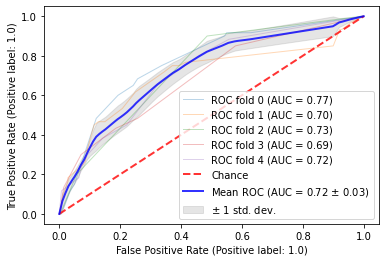

[[array([0.76      , 0.77595628, 0.78034682, 0.78698225, 0.79220779,
       0.82258065, 0.84883721, 0.875     , 0.91304348, 0.92647059,
       0.9122807 , 1.        ]), array([1.        , 0.93421053, 0.88815789, 0.875     , 0.80263158,
       0.67105263, 0.48026316, 0.46052632, 0.41447368, 0.41447368,
       0.34210526, 0.        ])], [array([0.75      , 0.74619289, 0.75257732, 0.75543478, 0.76162791,
       0.76047904, 0.76363636, 0.77922078, 0.79259259, 0.79844961,
       0.79527559, 0.8362069 , 0.83478261, 0.83333333, 0.83636364,
       0.64864865, 0.72413793, 0.71428571, 0.72727273, 0.75      ,
       1.        ]), array([1.        , 0.98      , 0.97333333, 0.92666667, 0.87333333,
       0.84666667, 0.84      , 0.8       , 0.71333333, 0.68666667,
       0.67333333, 0.64666667, 0.64      , 0.63333333, 0.61333333,
       0.16      , 0.14      , 0.13333333, 0.10666667, 0.08      ,
       0.        ])], [array([0.72      , 0.85714286, 0.9125    , 0.66666667, 1.        ,
       1.      

In [4]:
df = pd.read_csv('./../data/german_onehotencoded.csv')
ds = df.to_numpy()
y = ds[:,-2: -1] # for last column
x = ds[:, :-2] # for all but last column



cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
precisionrecalllist = []
y_pred_scores_list = []
mean_fpr = np.linspace(0, 1, 100)

y_real = []
y_proba = []
axes_steps = []

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(x, y)):

    grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1)
    grid_search_cv.fit(x[train], y[train])

    model = grid_search_cv.best_estimator_

    pred = model.predict(x[test])

    pred_proba = model.predict_proba(x[test])
    pred_scores = pred_proba.max(axis=1)
    print('F1: ', f1_score(pred, y[test]))
    print('Precision: ', precision_score(pred, y[test]))
    print('Recall: ', recall_score(pred, y[test]))
    tn, fp, fn, tp = confusion_matrix(y[test], pred).ravel()
    false_positive_rate = fp / (fp + tn)
    true_positive_rate = tp / (tp + fp)
    print('false positive rate: ', false_positive_rate)
    print('true positive rate:', true_positive_rate)

    precision, recall, _ = precision_recall_curve(y[test], pred_proba[:,1])

    y_real.append(y[test])
    y_proba.append(pred_proba[:,1])
    y_pred_scores_list.append(pred_scores)

    lab = 'Fold %d' % (i+1)
    axes_steps.append((recall, precision, lab))

    viz = RocCurveDisplay.from_estimator(
        model,
        x[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    prec, recall, _ = precision_recall_curve(pred, pred_scores, pos_label=np.array([x[0] for x in y[test].tolist()]))
    precisionrecalllist.append([prec, recall])

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
ax.legend(loc="lower right")
plt.savefig('german_onehotencoded_roc.pdf')
plt.show()

print(precisionrecalllist)

(5, 200)
(5, 200, 1)
(5, 200)


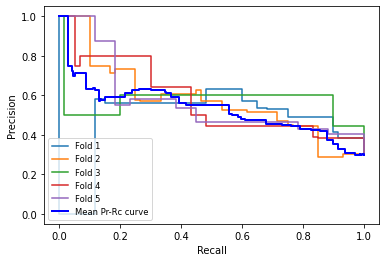

In [5]:
print(np.array(y_proba).shape)
print(np.array(y_real).shape)
print(np.array(y_pred_scores_list).shape)

fig, ax = plt.subplots()

for i in range(len(axes_steps)):
    ax.step(axes_steps[i][0], axes_steps[i][1], label = axes_steps[i][2])

y_real_test = np.concatenate(np.array(y_real))
y_proba_test = np.concatenate(np.array(y_proba))

precision, recall, _ = precision_recall_curve(y_real_test, y_proba_test)
lab = 'Mean Pr-Rc curve'
ax.step(recall, precision, label=lab, lw=2, color='b')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='lower left', fontsize='small')
plt.savefig('german_onehotencoded_prre.pdf')

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)

plt.show()

In [ ]:
df = pd.read_csv('./../data/creditcard.csv')
ds = df.to_numpy()
y = ds[:, -1] # for last column
x = ds[:, :-1] # for all but last column

cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
precisionrecalllist = []
y_pred_scores_list = []
mean_fpr = np.linspace(0, 1, 100)

y_real = []
y_proba = []
axes_steps = []

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(x, y)):

    #params = {'max_depth': [2,3,4,5,10]}
    grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1)
    grid_search_cv.fit(x[train], y[train])

    model = grid_search_cv.best_estimator_

    pred = model.predict(x[test])

    pred_proba = model.predict_proba(x[test])
    pred_scores = pred_proba.max(axis=1)
    print('F1: ', f1_score(pred, y[test]))
    print('Precision: ', precision_score(pred, y[test]))
    print('Recall: ', recall_score(pred, y[test]))
    tn, fp, fn, tp = confusion_matrix(y[test], pred).ravel()
    false_positive_rate = fp / (fp + tn)
    true_positive_rate = tp / (tp + fp)
    print('false positive rate: ', false_positive_rate)
    print('true positive rate:', true_positive_rate)

    precision, recall, _ = precision_recall_curve(y[test], pred_proba[:,1])

    y_real.append(y[test])
    y_proba.append(pred_proba[:,1])
    y_pred_scores_list.append(pred_scores)

    lab = 'Fold %d' % (i+1)
    axes_steps.append((recall, precision, lab))

    viz = RocCurveDisplay.from_estimator(
        model,
        x[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    prec, recall, _ = precision_recall_curve(pred, pred_scores, pos_label=y[test])
    precisionrecalllist.append([prec, recall])

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
ax.legend(loc="lower right")
plt.savefig('creditcard_roc.pdf')
plt.show()


Fitting 5 folds for each of 1494 candidates, totalling 7470 fits


In [ ]:
print(np.array(y_proba).shape)
print(np.array(y_real).shape)
print(np.array(y_pred_scores_list).shape)

fig, ax = plt.subplots()

for i in range(len(axes_steps)):
    ax.step(axes_steps[i][0], axes_steps[i][1], label = axes_steps[i][2])

y_real_test = np.concatenate(np.array(y_real))
y_proba_test = np.concatenate(np.array(y_proba))

precision, recall, _ = precision_recall_curve(y_real_test, y_proba_test)
lab = 'Mean Pr-Rc curve'
ax.step(recall, precision, label=lab, lw=2, color='b')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='lower left', fontsize='small')
plt.savefig('creditcard_prre.pdf')

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)

plt.show()

Fitting 5 folds for each of 1494 candidates, totalling 7470 fits


KeyboardInterrupt: 

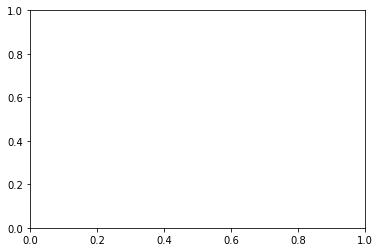

In [7]:
df = pd.read_csv('./../data/application_data_onehotencoded.csv')
y = df['TARGET'].to_numpy().reshape(-1,1) # for last column

a = [df.columns[0]]
b = df.columns[2:]
res = [*a, *b]
x = df[res].to_numpy() # for all but last column

cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
precisionrecalllist = []
y_pred_scores_list = []
mean_fpr = np.linspace(0, 1, 100)

y_real = []
y_proba = []
axes_steps = []

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(x, y)):

    #params = {'max_depth': [2,3,4,5,10]}
    grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1)
    grid_search_cv.fit(x[train], y[train])

    model = grid_search_cv.best_estimator_

    pred = model.predict(x[test])

    pred_proba = model.predict_proba(x[test])
    pred_scores = pred_proba.max(axis=1)
    print('F1: ', f1_score(pred, y[test]))
    print('Precision: ', precision_score(pred, y[test]))
    print('Recall: ', recall_score(pred, y[test]))
    tn, fp, fn, tp = confusion_matrix(y[test], pred).ravel()
    false_positive_rate = fp / (fp + tn)
    true_positive_rate = tp / (tp + fp)
    print('false positive rate: ', false_positive_rate)
    print('true positive rate:', true_positive_rate)

    precision, recall, _ = precision_recall_curve(y[test], pred_proba[:,1])

    y_real.append(y[test])
    y_proba.append(pred_proba[:,1])
    y_pred_scores_list.append(pred_scores)

    lab = 'Fold %d' % (i+1)
    axes_steps.append((recall, precision, lab))

    viz = RocCurveDisplay.from_estimator(
        model,
        x[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

    prec, recall, _ = precision_recall_curve(pred, pred_scores, pos_label=y[test])
    precisionrecalllist.append([prec, recall])

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)
ax.legend(loc="lower right")
plt.savefig('application_data_roc.pdf')
plt.show()


In [ ]:
print(np.array(y_proba).shape)
print(np.array(y_real).shape)
print(np.array(y_pred_scores_list).shape)

fig, ax = plt.subplots()

for i in range(len(axes_steps)):
    ax.step(axes_steps[i][0], axes_steps[i][1], label = axes_steps[i][2])

y_real_test = np.concatenate(np.array(y_real))
y_proba_test = np.concatenate(np.array(y_proba))

precision, recall, _ = precision_recall_curve(y_real_test, y_proba_test)
lab = 'Mean Pr-Rc curve'
ax.step(recall, precision, label=lab, lw=2, color='b')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='lower left', fontsize='small')
plt.savefig('application_data_prre.pdf')

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
)

plt.show()